Plot summary figure for cbs runs.

In [1]:
import numpy as np
import xarray as xr
import cmocean as cm
import colorcet as cc
import numpy.linalg as la
from scipy.io import netcdf
import matplotlib.pyplot as plt
import matplotlib as mpl
from xgcm import Grid
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from matplotlib.colors import SymLogNorm, BoundaryNorm
from matplotlib.ticker import LogFormatter
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']

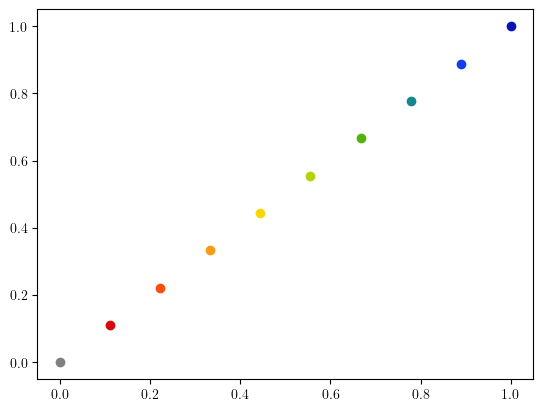

In [2]:
# Load the colormap
cmap = cc.cm['rainbow4']

# Pick evenly spaced points between 0 and 1
values = np.linspace(0, 1, 10)

# Get the RGBA colors
colors = [cmap(v) for v in values][::-1]
colors.insert(0, 'gray')

for i in range(len(values)):
    plt.scatter(values[i], values[i], color = colors[i])

colors = [colors[0], colors[1], colors[3], colors[4], colors[6], colors[7], colors[9]]

In [3]:
root = '/scratch/mp6191/NW2_TracerBackscatter'

exp = '/p25_noBS_SpinUp'
os_p25 = xr.concat([xr.open_dataset(root + exp + '/ocean.stats.nc'),
                    xr.open_dataset(root + exp + '/ocean.stats_1.nc'),
                    xr.open_dataset(root + exp + '/ocean.stats_2.nc'),
                    xr.open_dataset(root + exp + '/ocean.stats_3.nc'),
                    xr.open_dataset(root + exp + '/ocean.stats_4.nc'),
                    xr.open_dataset(root + '/p25_noBS/ocean.stats.nc'),
                    xr.open_dataset(root + '/p25_noBS_2/ocean.stats.nc'),
                    ], dim = 'Time')


# 1/4 deg
exp = '/p25_SQGBS_KHTR0_SpinUp'

os_p25SQGBS = xr.concat([xr.open_dataset(root + exp + '/ocean.stats.nc'),
                    xr.open_dataset(root + exp + '/ocean.stats_1.nc'),
                    xr.open_dataset(root + '/p25_SQGBS/ocean.stats.nc'),
                    xr.open_dataset(root + '/p25_SQGBS_2/ocean.stats.nc')
                    ], dim = 'Time')


# BS testing
exp = '/run1'
os_run1 = xr.concat([xr.open_dataset(root + '/BS_testing' + exp + '/ocean.stats.nc'),
                     xr.open_dataset(root + '/BS_testing' + exp + '_analysis' + '/ocean.stats.nc')], dim = 'Time')

exp = '/run2'
os_run2 = xr.concat([xr.open_dataset(root + '/BS_testing' + exp + '/ocean.stats.nc'),
                     xr.open_dataset(root + '/BS_testing' + exp + '_analysis' + '/ocean.stats.nc')], dim = 'Time')

exp = '/run3'
os_run3 = xr.concat([xr.open_dataset(root + '/BS_testing' + exp + '/ocean.stats.nc'),
                     xr.open_dataset(root + '/BS_testing' + exp + '_analysis' + '/ocean.stats.nc')], dim = 'Time')

exp = '/run4'
os_run4 = xr.concat([xr.open_dataset(root + '/BS_testing' + exp + '/ocean.stats.nc'),
                     xr.open_dataset(root + '/BS_testing' + exp + '_analysis' + '/ocean.stats.nc')], dim = 'Time')

exp = '/run5'
os_run5 = xr.concat([xr.open_dataset(root + '/BS_testing' + exp + '/ocean.stats.nc'),
                     xr.open_dataset(root + '/BS_testing' + exp + '_analysis' + '/ocean.stats.nc')], dim = 'Time')

# p03125
os_p03125 = xr.concat([xr.open_dataset(root + '/p03125_SpinUp_2/ocean.stats.nc').drop_vars('dye001'),
                       xr.open_dataset(root + '/p03125_2/ocean.stats.nc').isel(Time = slice(0, 60)).drop_vars('dye001'),
                       xr.open_dataset(root + '/p03125_2/ocean.stats_1.nc').drop_vars('dye001'),
                       xr.open_dataset(root + '/p03125_2/ocean.stats_2.nc').isel(Time = slice(None, -1)).drop_vars('dye001')
                        ], dim = 'Time', data_vars = 'minimal')
os_p03125 = os_p03125.assign_coords({'Time': os_p03125.Time + int(43000 * 86400 * 1e9)})

/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Ser

In [4]:
exp = '/p25_noBS_2'
cbs0_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.load()
cbs0_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.load()
cbs0_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
cbs0 = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False)
p25_static = xr.open_dataset(root + exp + '/static.nc', decode_times = False)
p25_eta = xr.open_dataset(root + '/p25_SpinUp' + '/MOM_IC.nc', decode_times = False).eta.isel(Time = -1)

exp = '/run4_analysis'
cbs0p5_kappa1 = xr.open_dataset(root + '/BS_testing' + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.load()
cbs0p5_kappa2 = xr.open_dataset(root + '/BS_testing' + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.load()
cbs0p5_h = xr.open_mfdataset(root + '/BS_testing' + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
cbs0p5 = xr.open_mfdataset(root + '/BS_testing' + exp + '/snapshots*.nc', decode_times = False)

exp = '/run5_analysis'
cbs1_kappa1 = xr.open_dataset(root + '/BS_testing' + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.load()
cbs1_kappa2 = xr.open_dataset(root + '/BS_testing' + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.load()
cbs1_h = xr.open_mfdataset(root + '/BS_testing' + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
cbs1 = xr.open_mfdataset(root + '/BS_testing' + exp + '/snapshots*.nc', decode_times = False)

exp = '/run2_analysis'
cbs1p5_kappa1 = xr.open_dataset(root + '/BS_testing' + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.load()
cbs1p5_kappa2 = xr.open_dataset(root + '/BS_testing' + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.load()
cbs1p5_h = xr.open_mfdataset(root + '/BS_testing' + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
cbs1p5 = xr.open_mfdataset(root + '/BS_testing' + exp + '/snapshots*.nc', decode_times = False)

exp = '/p25_SQGBS_2'
cbs2_kappa1 = xr.open_dataset(root + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.load()
cbs2_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.load()
cbs2_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
cbs2 = xr.open_mfdataset(root + exp + '/snapshots*.nc', decode_times = False)

exp = '/run1_analysis'
cbs2p5_kappa1 = xr.open_dataset(root + '/BS_testing' + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.load()
cbs2p5_kappa2 = xr.open_dataset(root + '/BS_testing' + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.load()
cbs2p5_h = xr.open_mfdataset(root + '/BS_testing' + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
cbs2p5 = xr.open_mfdataset(root + '/BS_testing' + exp + '/snapshots*.nc', decode_times = False)

exp = '/run3_analysis'
cbs4_kappa1 = xr.open_dataset(root + '/BS_testing' + exp + '/MMT_kappa1_corr.nc', decode_times = False).kappa1.load()
cbs4_kappa2 = xr.open_dataset(root + '/BS_testing' + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.load()
cbs4_h = xr.open_mfdataset(root + '/BS_testing' + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').load()
cbs4 = xr.open_mfdataset(root + '/BS_testing' + exp + '/snapshots*.nc', decode_times = False)

# Grid
p25_grid = Grid(cbs0, coords = {'X': {'center': 'xh', 'outer': 'xq'},
                                'Y': {'center': 'yh', 'outer': 'yq'}})

/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Ser

In [5]:
def EKEBT(ds, ds_h, grid, res):

    h = ds_h
    u = grid.interp(ds.u, axis = 'X')
    v = grid.interp(ds.v, axis = 'Y')

    uBT = (u * h).sum('zl') / h.sum('zl')
    vBT = (v * h).sum('zl') / h.sum('zl')

    uBTp = uBT - uBT.mean('time')
    vBTp = vBT - vBT.mean('time')

    EKEBT = (uBTp ** 2 + vBTp ** 2) / 2
    EKEBT = EKEBT#.coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()

    return EKEBT.mean('time').load()

def thickness_to_eta(ds, static, eta):
    '''
    Converts thickness to eta
    '''
    xh = ds.xh.values
    yh = ds.yh.values
    zi = eta.Interface.values
    time = ds.time.values
    shape = (time.size, zi.size, yh.size, xh.size)
    e = xr.DataArray(data = np.zeros(shape),
                     dims = ['time', 'zi', 'yh', 'xh'], 
                     coords = {'xh' : xh, 'yh' : yh, 'zi' : zi, 'time' : time}).rename('eta')

    D = static.depth_ocean
    h = ds.h
    for k in range(zi.size):
        e[:, k, :, :] = h.isel(zl = slice(k, None)).sum('zl', skipna = False) - D

    return e

def thickness_to_eta_mean(ds_h, static, eta):
    '''
    Converts time mean thickness to eta
    '''
    xh = ds_h.xh.values
    yh = ds_h.yh.values
    zi = eta.Interface.values
    shape = (zi.size, yh.size, xh.size)
    e = xr.DataArray(data = np.zeros(shape),
                     dims = ['zi', 'yh', 'xh'], 
                     coords = {'xh' : xh, 'yh' : yh, 'zi' : zi}).rename('eta')

    D = static.depth_ocean
    h = ds_h
    for k in range(zi.size):
        e[k, :, :] = h.isel(zl = slice(k, None)).sum('zl', skipna = False) - D

    return e

def calc_length(ds, ds_h, static, eta):
    '''
    Calculates energy containing scale
    '''   
    Re = 6.37e6

    ssh = thickness_to_eta(ds, static, eta).isel(zi = 0)
    ssh_clim = thickness_to_eta_mean(ds_h, static, eta).isel(zi = 0)
    ssh_anom = ssh - ssh_clim

    lat = static['geolat']
    ssh_anom_dx = ssh_anom.differentiate('xh') * 360 / (2 * np.pi * Re * np.cos(lat * np.pi / 180))
    ssh_anom_dy = ssh_anom.differentiate('yh') * 360 / (2 * np.pi * Re)

    le = np.sqrt((ssh_anom ** 2).mean('time') / (ssh_anom_dx ** 2 + ssh_anom_dy ** 2).mean('time')).rename('Le')

    return le.load()

In [6]:
res = 0.25

cbs0_EKEBT = EKEBT(cbs0, cbs0_h, p25_grid, res)
cbs0p5_EKEBT = EKEBT(cbs0p5, cbs0p5_h, p25_grid, res)
cbs1_EKEBT = EKEBT(cbs1, cbs1_h, p25_grid, res)
cbs1p5_EKEBT = EKEBT(cbs1p5, cbs1p5_h, p25_grid, res)
cbs2_EKEBT = EKEBT(cbs2, cbs2_h, p25_grid, res)
cbs2p5_EKEBT = EKEBT(cbs2p5, cbs2p5_h, p25_grid, res)
cbs4_EKEBT = EKEBT(cbs4, cbs4_h, p25_grid, res)

cbs0_le = calc_length(cbs0, cbs0_h, p25_static, p25_eta)
cbs0p5_le = calc_length(cbs0p5, cbs0p5_h, p25_static, p25_eta)
cbs1_le = calc_length(cbs1, cbs1_h, p25_static, p25_eta)
cbs1p5_le = calc_length(cbs1p5, cbs1p5_h, p25_static, p25_eta)
cbs2_le = calc_length(cbs2, cbs2_h, p25_static, p25_eta)
cbs2p5_le = calc_length(cbs2p5, cbs2p5_h, p25_static, p25_eta)
cbs4_le = calc_length(cbs4, cbs4_h, p25_static, p25_eta)

/ext3/miniconda3/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/ext3/miniconda3/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/ext3/miniconda3/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/ext3/miniconda3/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/ext3/miniconda3/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/ext3/miniconda3/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute

In [7]:
# 1/32
exp = '/p03125_2'
p03125_h = xr.open_mfdataset(root + exp + '/MMT_fields*.nc', decode_times = False).h.mean('time').coarsen(xh = int(2 / 0.03125), yh = int(2 / 0.03125), boundary = 'exact').mean()
p03125_kappa2 = xr.open_dataset(root + exp + '/MMT_kappa2_corr.nc', decode_times = False).kappa2.load()
p03125_kappa2 = ((p03125_kappa2.where(p03125_kappa2 >= 0) * p03125_h).sum('zl') / p03125_h.sum('zl')).compute()
p03125_EKEBT = xr.open_dataset(root + exp + '/p03125_EKEBT_zm.nc', decode_times = False)['__xarray_dataarray_variable__']

/ext3/miniconda3/lib/python3.10/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [8]:
# Linear fits
A = p25_static.area_t
res = 0.25

x = np.array([((np.sqrt(cbs0_EKEBT) * A).sum(['xh', 'yh']) / A.sum(['xh', 'yh'])).item(),
              ((np.sqrt(cbs0p5_EKEBT) * A).sum(['xh', 'yh']) / A.sum(['xh', 'yh'])).item(),
              ((np.sqrt(cbs1_EKEBT) * A).sum(['xh', 'yh']) / A.sum(['xh', 'yh'])).item(),
              ((np.sqrt(cbs1p5_EKEBT) * A).sum(['xh', 'yh']) / A.sum(['xh', 'yh'])).item(),
              ((np.sqrt(cbs2_EKEBT) * A).sum(['xh', 'yh']) / A.sum(['xh', 'yh'])).item(),
              ((np.sqrt(cbs2p5_EKEBT) * A).sum(['xh', 'yh']) / A.sum(['xh', 'yh'])).item(),
              ((np.sqrt(cbs4_EKEBT) * A).sum(['xh', 'yh']) / A.sum(['xh', 'yh'])).item()])

def kappa_gm(h, kappa):
    h_coarse = h.coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
    A_coarse = A.coarsen(xh = int(2 / res), yh = int(2 / res), boundary = 'exact').mean()
    kappa = kappa.where(kappa >= 0)
    return ((kappa * h_coarse * A_coarse).sum(['xh', 'yh', 'zl']) / (h_coarse * A_coarse).sum(['xh', 'yh', 'zl'])).item()

y_kappa1 = np.zeros(7)
y_kappa1[0] = kappa_gm(cbs0_h, cbs0_kappa1)
y_kappa1[1] = kappa_gm(cbs0p5_h, cbs0p5_kappa1)
y_kappa1[2] = kappa_gm(cbs1_h, cbs1_kappa1)
y_kappa1[3] = kappa_gm(cbs1p5_h, cbs1p5_kappa1)
y_kappa1[4] = kappa_gm(cbs2_h, cbs2_kappa1)
y_kappa1[5] = kappa_gm(cbs2p5_h, cbs2p5_kappa1)
y_kappa1[6] = kappa_gm(cbs4_h, cbs4_kappa1)

y_kappa2 = np.zeros(7)
y_kappa2[0] = kappa_gm(cbs0_h, cbs0_kappa2)
y_kappa2[1] = kappa_gm(cbs0p5_h, cbs0p5_kappa2)
y_kappa2[2] = kappa_gm(cbs1_h, cbs1_kappa2)
y_kappa2[3] = kappa_gm(cbs1p5_h, cbs1p5_kappa2)
y_kappa2[4] = kappa_gm(cbs2_h, cbs2_kappa2)
y_kappa2[5] = kappa_gm(cbs2p5_h, cbs2p5_kappa2)
y_kappa2[6] = kappa_gm(cbs4_h, cbs4_kappa2)

### Plot

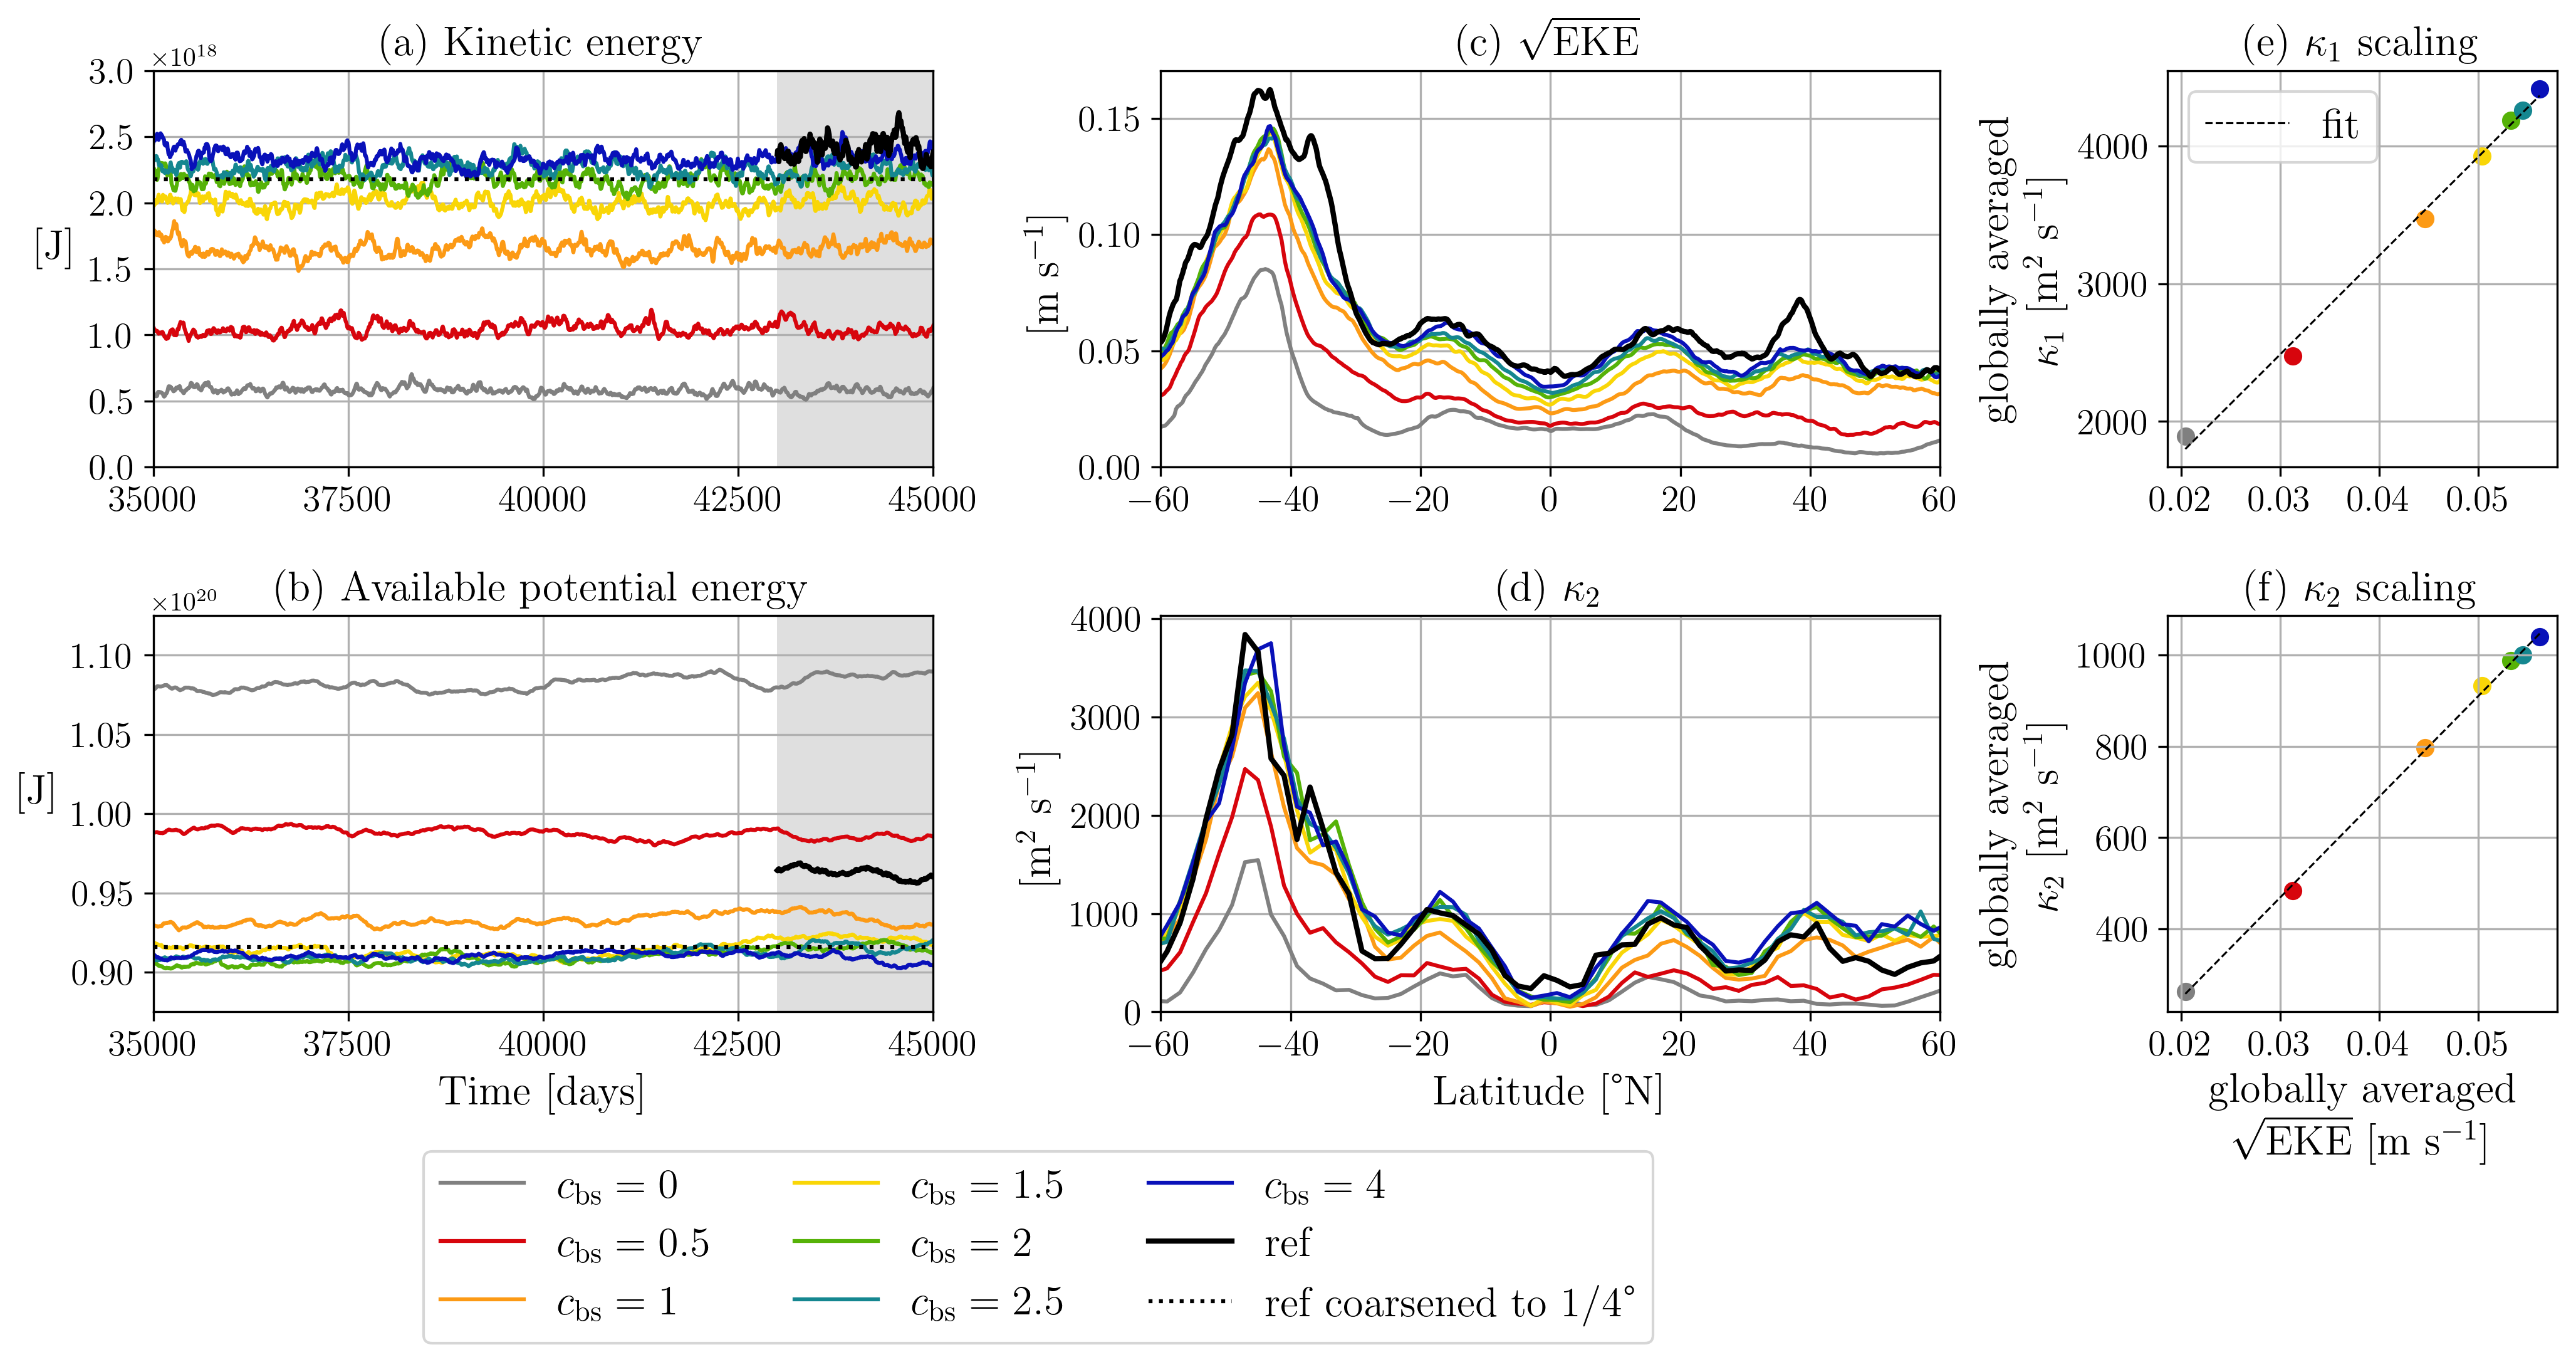

In [12]:
# Set up the figure
fig = plt.figure(figsize = (16.5, 6.5), dpi = 300)  # Adjust size as needed
fontsize = 16

# Create GridSpec
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 2, 1], height_ratios=[1, 1], figure=fig, wspace=0.35, hspace=0.375)

# Create the subplots
ax1 = fig.add_subplot(gs[0, 0])  # Top-left (wide)
ax2 = fig.add_subplot(gs[1, 0])  # Bottom-left (wide)
ax3 = fig.add_subplot(gs[0, 1])  # Top-middle (wide)
ax4 = fig.add_subplot(gs[1, 1])  # Bottom-middle (wide)
ax5 = fig.add_subplot(gs[0, 2])  # Top-right (square)
ax6 = fig.add_subplot(gs[1, 2])  # Bottom-right (square)

### (a, b) Energies

tmin = 35000
tmax = 45000
t = np.linspace(tmin, tmax, 101)
analysis_reg_min = 43000
analysis_reg_max = 45000

KE_p03125_p25 = 2.18e18
APE_p03125_p25 = 9.16e19
En_p03125_p25 = KE_p03125_p25 + APE_p03125_p25

ax = ax1
ax.plot(os_p25.Time / 86400 / 1e9, os_p25.KE.sum('Layer'), color = colors[0])
ax.plot(os_run4.Time / 86400 / 1e9, os_run4.KE.sum('Layer'), color = colors[1])
ax.plot(os_run5.Time / 86400 / 1e9, os_run5.KE.sum('Layer'), color = colors[2])
ax.plot(os_run2.Time / 86400 / 1e9, os_run2.KE.sum('Layer'), color = colors[3])
ax.plot(os_p25SQGBS.Time / 86400 / 1e9, os_p25SQGBS.KE.sum('Layer'), color = colors[4])
ax.plot(os_run1.Time / 86400 / 1e9, os_run1.KE.sum('Layer'), color = colors[5])
ax.plot(os_run3.Time / 86400 / 1e9, os_run3.KE.sum('Layer'), color = colors[6])
ax.plot(os_p03125.Time / 86400 / 1e9, os_p03125.KE.sum('Layer'), color = 'k', linewidth = 2)

ax.plot(t, t * 0 + KE_p03125_p25, ':', color = 'k')#, linewidth = 0.7)
ax.axvspan(analysis_reg_min, analysis_reg_max, alpha = 0.5, color = 'silver', linewidth = 0)
ax.set_ylim((0, 3e18))
ax.set_xlim((tmin, tmax))
#ax.tick_params(labelbottom = False)
ax.set_xlabel('',fontsize = fontsize)
ax.set_ylabel('[J]', rotation = 0, labelpad = 12, fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize - 2)
ax.set_yticks(np.linspace(0., 3.0e18, 7))
ax.set_xticks(np.linspace(tmin, tmax, 5))
ax.set_title('(a) Kinetic energy', fontsize = fontsize)
ax.grid()

ax = ax2
ax.plot(os_p25.Time / 86400 / 1e9, os_p25.APE.sum('Interface'), label = '$c_{\mathrm{bs}} = 0$', color = colors[0])
ax.plot(os_run4.Time / 86400 / 1e9, os_run4.APE.sum('Interface'), label = '$c_{\mathrm{bs}} = 0.5$', color = colors[1])
ax.plot(os_run5.Time / 86400 / 1e9, os_run5.APE.sum('Interface'), label = '$c_{\mathrm{bs}} = 1$', color = colors[2])
ax.plot(os_run2.Time / 86400 / 1e9, os_run2.APE.sum('Interface'), label = '$c_{\mathrm{bs}} = 1.5$', color = colors[3])
ax.plot(os_p25SQGBS.Time / 86400 / 1e9, os_p25SQGBS.APE.sum('Interface'), label = '$c_{\mathrm{bs}} = 2$', color = colors[4])
ax.plot(os_run1.Time / 86400 / 1e9, os_run1.APE.sum('Interface'), label = '$c_{\mathrm{bs}} = 2.5$', color = colors[5])
ax.plot(os_run3.Time / 86400 / 1e9, os_run3.APE.sum('Interface'), label = '$c_{\mathrm{bs}} = 4$', color = colors[6])
ax.plot(os_p03125.Time / 86400 / 1e9, os_p03125.APE.sum('Interface'), label = 'ref', color = 'k', linewidth = 2)
ax.plot(t, t * 0 + APE_p03125_p25, ':', label = 'ref coarsened to 1/4°', color = 'k')#, linewidth = 0.7)
ax.axvspan(analysis_reg_min, analysis_reg_max, alpha = 0.5, color = 'silver', linewidth = 0)
ax.set_ylim((0.e20, 1.3e20))
ax.set_ylim((0.875e20, 1.125e20))
ax.set_xlim((tmin, tmax))
ax.set_xlabel('Time [days]',fontsize = fontsize)
ax.set_ylabel('[J]', rotation = 0, labelpad = 12, fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize - 2)
#ax.set_yticks(np.linspace(0.9e20, 1.05e20, 3))
ax.set_xticks(np.linspace(tmin, tmax, 5))
ax.set_title('(b) Available potential energy', fontsize = fontsize)
ax.grid()
#fig.legend(fontsize = fontsize, ncol = 1, bbox_to_anchor = (0.08, 0.7))
legend = ax.legend(fontsize = fontsize, ncol = 3, bbox_to_anchor = (1.95, -0.3))

### Zonal means
ax = ax3
np.sqrt(cbs0_EKEBT).mean('xh').plot(ax = ax, color = colors[0], label = '$c_{\mathrm{bs}} = 0$')
np.sqrt(cbs0p5_EKEBT).mean('xh').plot(ax = ax, color = colors[1], label = '$c_{\mathrm{bs}} = 0.5$')
np.sqrt(cbs1_EKEBT).mean('xh').plot(ax = ax, color = colors[2], label = '$c_{\mathrm{bs}} = 1$')
np.sqrt(cbs1p5_EKEBT).mean('xh').plot(ax = ax, color = colors[3], label = '$c_{\mathrm{bs}} = 1.5$')
np.sqrt(cbs2_EKEBT).mean('xh').plot(ax = ax, color = colors[4], label = '$c_{\mathrm{bs}} = 2$')
np.sqrt(cbs2p5_EKEBT).mean('xh').plot(ax = ax, color = colors[5], label = '$c_{\mathrm{bs}} = 2.5$')
np.sqrt(cbs4_EKEBT).mean('xh').plot(ax = ax, color = colors[6], label = '$c_{\mathrm{bs}} = 4$')
np.sqrt(p03125_EKEBT).plot(ax = ax, color = 'k', label = 'ref', linewidth = 2)
ax.set_title('(c) $\sqrt{\mathrm{EKE}}$', fontsize = fontsize)
ax.set_ylabel('[m s$^{-1}$]', fontsize = fontsize)
ax.set_xlabel('', fontsize = fontsize)
ax.grid()
ax.set_xlim([-60, 60])
ax.set_ylim([0, None])
ax.tick_params(axis = 'both', labelsize = fontsize - 2)

ax = ax4
((cbs0_kappa2.where(cbs0_kappa2 >=0).isel(xh = slice(1, None)) * cbs0_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean()).sum('zl') / cbs0_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean().sum('zl')).mean('xh').plot(ax = ax, color = colors[0], label = '$c_{\mathrm{bs}} = 0$')
((cbs0p5_kappa2.where(cbs0p5_kappa2 >=0).isel(xh = slice(1, None)) * cbs0p5_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean()).sum('zl') / cbs0p5_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean().sum('zl')).mean('xh').plot(ax = ax, color = colors[1], label = '$c_{\mathrm{bs}} = 0.5$')
((cbs1_kappa2.where(cbs1_kappa2 >=0).isel(xh = slice(1, None)) * cbs1_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean()).sum('zl') / cbs1_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean().sum('zl')).mean('xh').plot(ax = ax, color = colors[2], label = '$c_{\mathrm{bs}} = 1$')
((cbs1p5_kappa2.where(cbs1p5_kappa2 >=0).isel(xh = slice(1, None)) * cbs1p5_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean()).sum('zl') / cbs1p5_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean().sum('zl')).mean('xh').plot(ax = ax, color = colors[3], label = '$c_{\mathrm{bs}} = 1.5$')
((cbs2_kappa2.where(cbs2_kappa2 >=0).isel(xh = slice(1, None)) * cbs2_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean()).sum('zl') / cbs2_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean().sum('zl')).mean('xh').plot(ax = ax, color = colors[4], label = '$c_{\mathrm{bs}} = 2$')
((cbs2p5_kappa2.where(cbs2p5_kappa2 >=0).isel(xh = slice(1, None)) * cbs2p5_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean()).sum('zl') / cbs2p5_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean().sum('zl')).mean('xh').plot(ax = ax, color = colors[5], label = '$c_{\mathrm{bs}} = 2.5$')
((cbs4_kappa2.where(cbs4_kappa2 >=0).isel(xh = slice(1, None)) * cbs4_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean()).sum('zl') / cbs4_h.coarsen(xh = int(2/0.25), yh = int(2/0.25), boundary = 'exact').mean().sum('zl')).mean('xh').plot(ax = ax, color = colors[6], label = '$c_{\mathrm{bs}} = 4$')
p03125_kappa2.mean('xh').plot(ax = ax, color = 'k', label = 'ref', linewidth = 2)
ax.set_title('(d) $\kappa_2$', fontsize = fontsize)
ax.set_ylabel('[m$^2$ s$^{-1}$]', fontsize = fontsize)
ax.set_xlabel('Latitude [°N]', fontsize = fontsize)
ax.grid()
ax.set_xlim([-60, 60])
ax.set_ylim([0, None])
ax.tick_params(axis = 'both', labelsize = fontsize - 2)


### Global means
ax = ax5
m, b = np.polyfit(x, y_kappa1, deg = 1)
ax.plot(x, m * x + b, color = 'k', linestyle = '--', linewidth = 0.75, label = 'fit')
ax.scatter(x[0], y_kappa1[0], color = colors[0])
ax.scatter(x[1], y_kappa1[1], color = colors[1])
ax.scatter(x[2], y_kappa1[2], color = colors[2])
ax.scatter(x[3], y_kappa1[3], color = colors[3])
ax.scatter(x[4], y_kappa1[4], color = colors[4])
ax.scatter(x[5], y_kappa1[5], color = colors[5])
ax.scatter(x[6], y_kappa1[6], color = colors[6])

ax.set_title('(e) $\kappa_1$ scaling', fontsize = fontsize)
ax.set_ylabel('globally averaged \n $\kappa_1$ [m$^2$ s$^{-1}$]', fontsize = fontsize)
ax.set_xlabel('', fontsize = fontsize)
#ax.tick_params(labelbottom = False)
ax.grid()
ax.legend(fontsize = fontsize, loc = 'upper left')
ax.tick_params(axis = 'both', labelsize = fontsize - 2)
ax.set_xticks(np.linspace(0.02, 0.05, 4))

ax = ax6
m, b = np.polyfit(x, y_kappa2, deg = 1)
ax.plot(x, m * x + b, color = 'k', linestyle = '--', linewidth = 0.75)
ax.scatter(x[0], y_kappa2[0], color = colors[0])
ax.scatter(x[1], y_kappa2[1], color = colors[1])
ax.scatter(x[2], y_kappa2[2], color = colors[2])
ax.scatter(x[3], y_kappa2[3], color = colors[3])
ax.scatter(x[4], y_kappa2[4], color = colors[4])
ax.scatter(x[5], y_kappa2[5], color = colors[5])
ax.scatter(x[6], y_kappa2[6], color = colors[6])

ax.set_title('(f) $\kappa_2$ scaling', fontsize = fontsize)
ax.set_ylabel('globally averaged \n $\kappa_2$ [m$^2$ s$^{-1}$]', fontsize = fontsize)
ax.set_xlabel('globally averaged \n $\sqrt{\mathrm{EKE}}$ [m s$^{-1}$]', fontsize = fontsize)
ax.grid()
ax.tick_params(axis = 'both', labelsize = fontsize - 2)
ax.set_xticks(np.linspace(0.02, 0.05, 4))

plt.savefig('Fig_cbs.pdf', bbox_inches = 'tight', dpi = 300)